In [24]:
import pandas as pd
import numpy as np

import scipy.stats as stats # for qq plot

# for visualisations
import matplotlib.pyplot as plt
import seaborn as sns

# for training and accuracy check
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

# ML models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# transformers
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [26]:
df = pd.read_csv('../train.csv', usecols=['Age', 'Fare', 'Survived']) # taking only required fields

In [28]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [30]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

*'Age' has missing values, so filling them with mean values*

In [33]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_4572\1698716155.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)


In [35]:
X = df.iloc[:, 1:3] # age, fare
y = df.iloc[:, 0] # survived

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C:\Users\hp\AppData\Local\Temp\ipykernel_4572\517033193.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


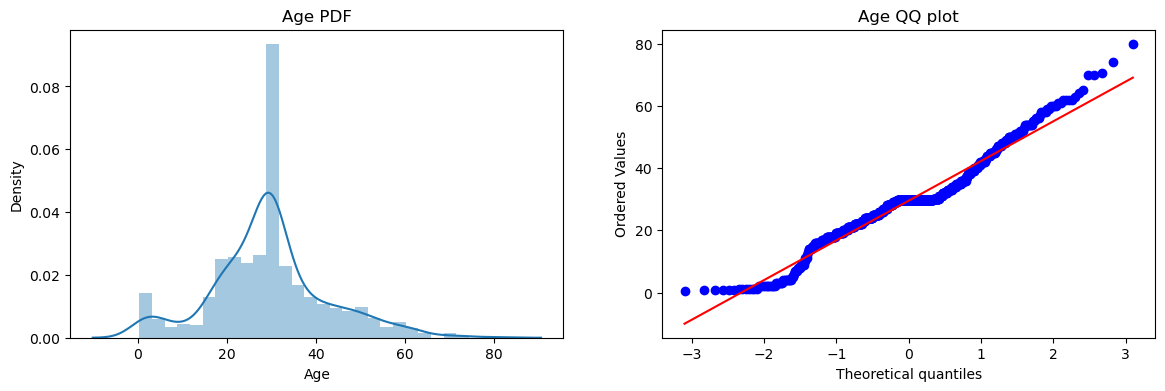

In [43]:
# age distribution
plt.figure(figsize = (14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist='norm', plot=plt)
plt.title('Age QQ plot')

plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_4572\2427159148.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


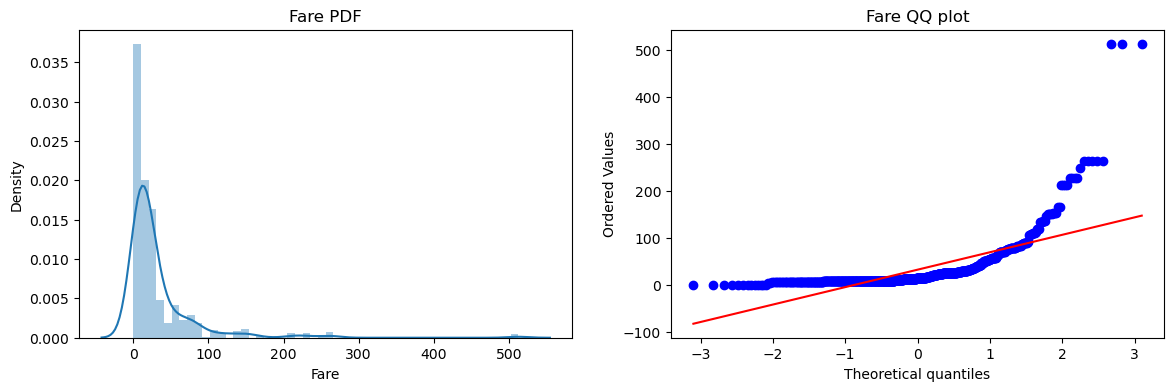

In [45]:
# fare distribution
plt.figure(figsize = (14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist='norm', plot=plt)
plt.title('Fare QQ plot')

plt.show()

*after seeing the visualizations we got to know that age is slightly normal but the fare is right skewed*

In [49]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [53]:
clf.fit(X_train, y_train)
clf2.fit(X_train, y_train)

y_pred = clf.predict(X_test)
y_pred1 = clf2.predict(X_test)

# accuracy before transformation
print("Accuracy LR: ", accuracy_score(y_test, y_pred))
print("Accuracy DT: ", accuracy_score(y_test, y_pred1))

Accuracy LR:  0.6480446927374302
Accuracy DT:  0.664804469273743


In [57]:
# log transform
trf = FunctionTransformer(func=np.log1p) # log(x+1) -> log1p

In [59]:
# performing transformation
X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.fit_transform(X_test)

In [78]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed, y_train)
clf2.fit(X_train_transformed, y_train)

y_pred = clf.predict(X_test_transformed)
y_pred = clf2.predict(X_test_transformed)

# accuracy after transformation
print("Accuracy LR: ", accuracy_score(y_test, y_pred))
print("Accuracy DT: ", accuracy_score(y_test, y_pred))

Accuracy LR:  0.6871508379888268
Accuracy DT:  0.6871508379888268


### After performing transformation accuracy increase that's why we use transformer to make it simple for models to perfrom operations/calculation on them

In [80]:
X_transformed = trf.fit_transform(X)

In [86]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR: ", np.mean(cross_val_score(clf, X_transformed, y, scoring='accuracy', cv=10)))
print("DT: ", np.mean(cross_val_score(clf2, X_transformed, y, scoring='accuracy', cv=10)))

LR:  0.678027465667915
DT:  0.658876404494382


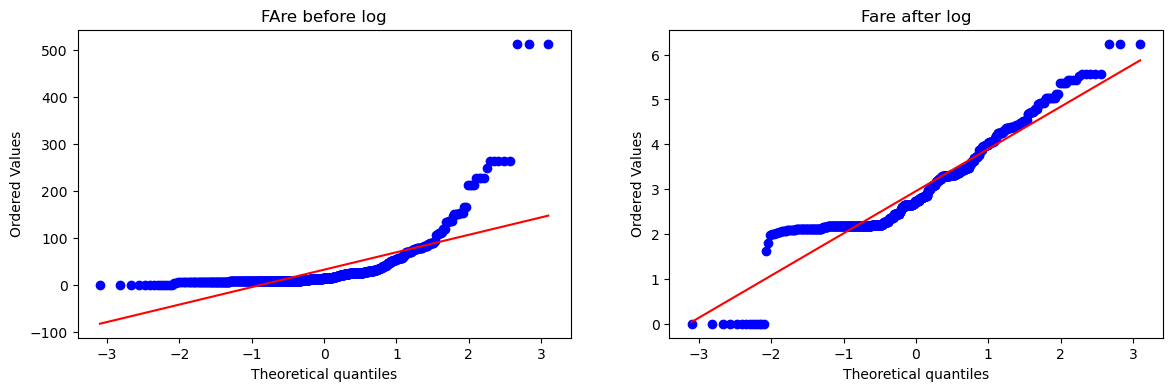

In [92]:
# before after transition of fare
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('FAre before log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist="norm", plot=plt)
plt.title('Fare after log')

plt.show()

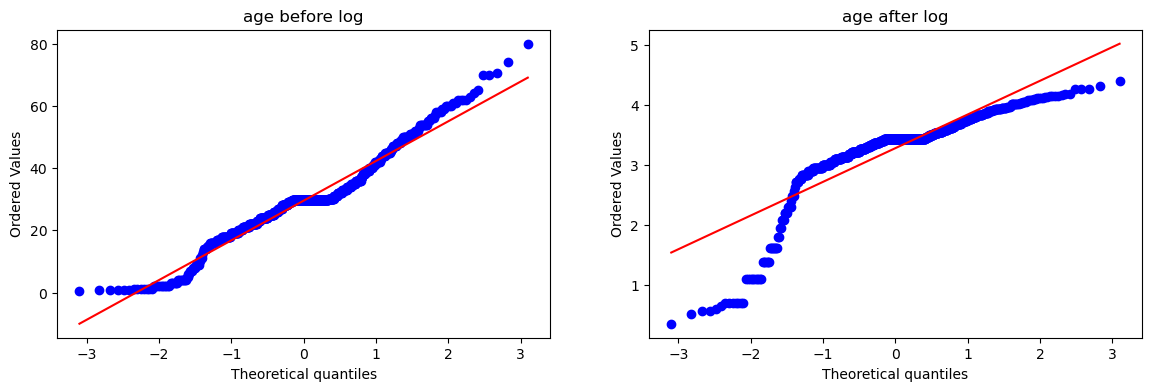

In [94]:
# before after transition of age
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('age before log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist="norm", plot=plt)
plt.title('age after log')

plt.show()

*fare mein transformation mein improvement aaya but on age usne hag diya*

In [97]:
trf2 = ColumnTransformer([('log', FunctionTransformer(np.log1p), ['Fare'])], remainder='passthrough')

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)

In [99]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2, y_train)
clf2.fit(X_train_transformed2, y_train)

y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf.predict(X_test_transformed2)

print("Accuracy LR: ", accuracy_score(y_test, y_pred))
print("Accuracy DT: ", accuracy_score(y_test, y_pred2))

Accuracy LR:  0.6703910614525139
Accuracy DT:  0.6703910614525139


In [101]:
X_transformed2 = trf2.fit_transform(X)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR: ", np.mean(cross_val_score(clf, X_transformed2, y, scoring='accuracy', cv=10)))
print("DT: ", np.mean(cross_val_score(clf2, X_transformed2, y, scoring='accuracy', cv=10)))

LR:  0.6712609238451936
DT:  0.6667041198501873


In [103]:
# other transformations
def apply_transform(transform):
    X = df.iloc[:, 1:3]
    y = df.iloc[:, 0]

    trf = ColumnTransformer([('log', FunctionTransformer(transform), ['Fare'])], remainder='passthrough')

    X_trans = trf.fit_transform(X)
    clf = LogisticRegression()

    print("Accuracy: ", np.mean(cross_val_score(clf, X_trans, y, scoring='accuracy', cv=10)))

    plt.figure(figsize=(14, 4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title("Fare Before Transform")

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title("Fare After Transform")

    plt.show()

Accuracy:  0.6431335830212235


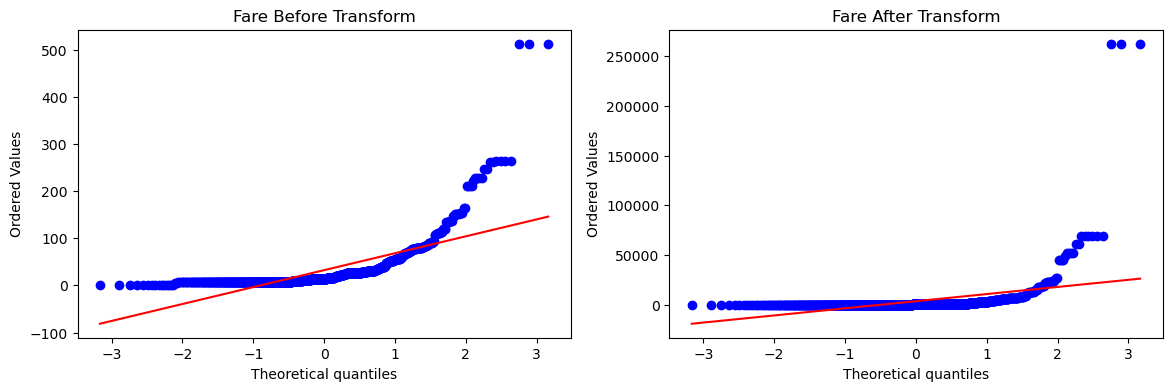

In [109]:
apply_transform(lambda x: x**2)

Accuracy:  0.6589013732833957


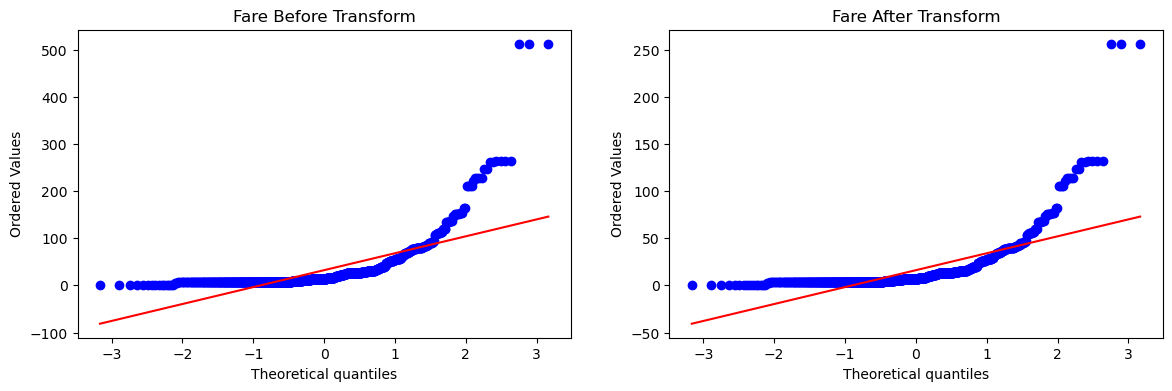

In [111]:
apply_transform(lambda x: x**1/2)

Accuracy:  0.61729088639201


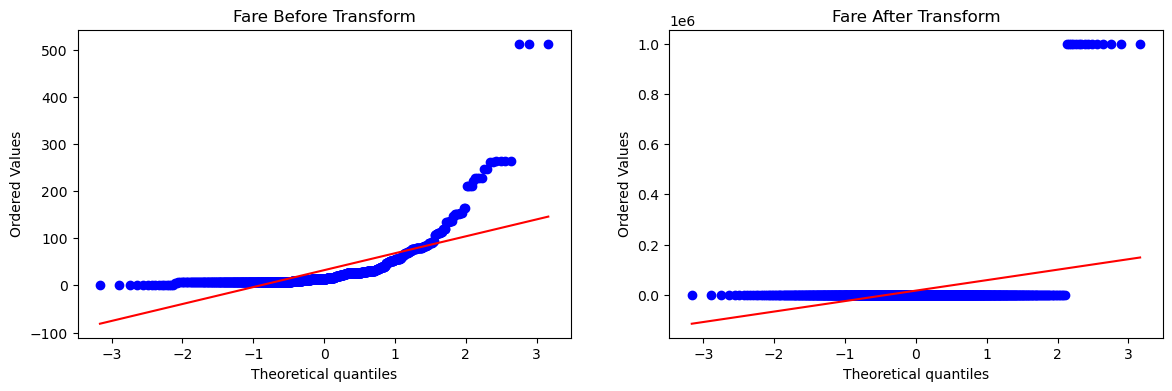

In [119]:
apply_transform(lambda x: 1/(x + 0.000001))
